In [18]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [27]:
# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])
broad_2019 = broad_2019.rename(columns={' BROADBAND AVAILABILITY PER FCC ':'BROADBAND AVAILABILITY PER FCC',' BROADBAND USAGE ':'BROADBAND USAGE' })

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])
broad_2020 = broad_2020.rename(columns={' BROADBAND AVAILABILITY PER FCC ' : 'BROADBAND AVAILABILITY PER FCC', ' BROADBAND USAGE ':'BROADBAND USAGE'})

# State regions csv file
regions = pd.read_csv('input/regions_by_state.csv')

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
#broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

In [28]:
#Merge the two data data frames from 2019 and 2020
broad_change = pd.merge(broad_2019, broad_2020, on=['COUNTY ID','COUNTY NAME','ST'], validate="one_to_one")
#Rename the colums to more sensible names
broad_change = broad_change.rename(columns={"BROADBAND AVAILABILITY PER FCC_x": "AVAILABILITY_2019", "BROADBAND USAGE_x": "USAGE_2019",
        "BROADBAND AVAILABILITY PER FCC_y": "AVAILABILITY_2020", "BROADBAND USAGE_y": "USAGE_2020"})

#Find the the changes in availability and usage between 2020 and 2019
broad_change['AVAILABILITY_CHANGE'] = broad_change['AVAILABILITY_2020'] - broad_change['AVAILABILITY_2019']
broad_change['USAGE_CHANGE'] = broad_change['USAGE_2020'] - broad_change['USAGE_2019']

#Sort table
broad_change = broad_change.sort_values(by = ['AVAILABILITY_CHANGE'])

#save the new data frame to a new csv fill
broad_change.to_csv('input/broadband_data_change.csv', index=False)

### 2019 broadband scatterplot

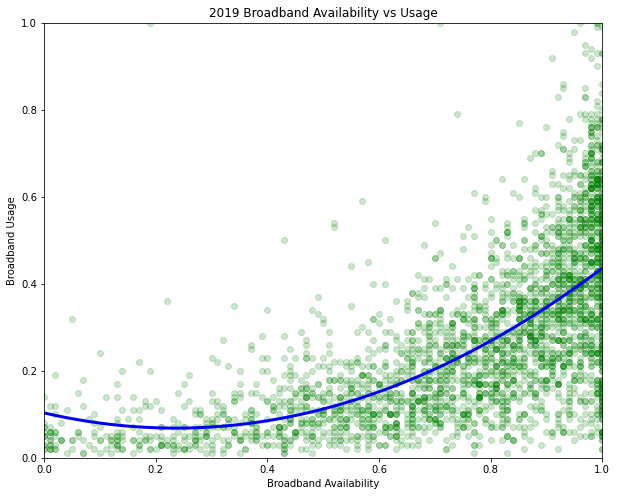

In [21]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usage')
plt.title('2019 Broadband Availability vs Usage')
plt.scatter(broad_2019['BROADBAND AVAILABILITY PER FCC'], broad_2019['BROADBAND USAGE'], alpha = 0.2, c = "green")

(a, b , c) = np.polyfit(broad_2019['BROADBAND AVAILABILITY PER FCC'], broad_2019['BROADBAND USAGE'], 2)
eq = a * broad_2019['BROADBAND AVAILABILITY PER FCC']**2 + b * broad_2019['BROADBAND AVAILABILITY PER FCC'] + c
plt.plot(broad_2019['BROADBAND AVAILABILITY PER FCC'], eq, c = 'blue', linewidth = 3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### 2020 broadband scatterplot

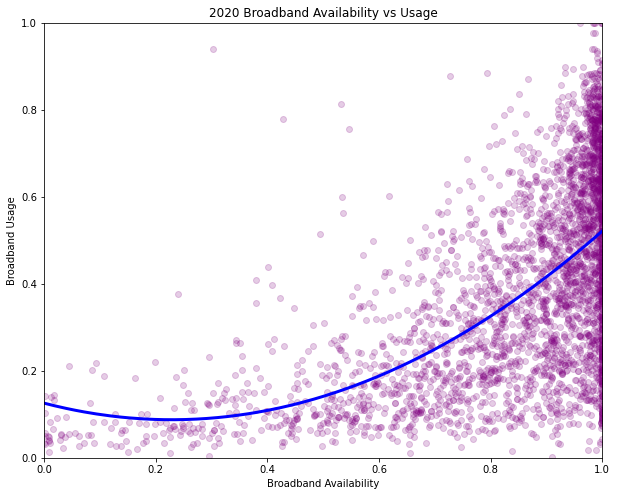

In [22]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usage')
plt.title('2020 Broadband Availability vs Usage')
plt.scatter(broad_2020['BROADBAND AVAILABILITY PER FCC'], broad_2020['BROADBAND USAGE'], alpha = 0.2, c = "purple")
(a, b , c) = np.polyfit(broad_2020['BROADBAND AVAILABILITY PER FCC'], broad_2020['BROADBAND USAGE'], 2)
eq = a * broad_2020['BROADBAND AVAILABILITY PER FCC']**2 + b * broad_2020['BROADBAND AVAILABILITY PER FCC'] + c
plt.plot(broad_2020['BROADBAND AVAILABILITY PER FCC'], eq, c = 'blue', linewidth = 3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Plot change in availability vs change in usability

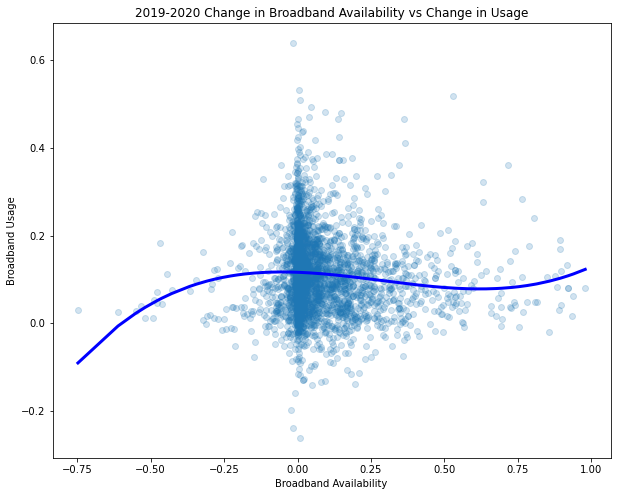

In [23]:
# Plot changes in availability and usage
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(broad_change['AVAILABILITY_CHANGE'], broad_change['USAGE_CHANGE'], alpha = 0.2)

# Best fit line showing net change
(m, b) = np.polyfit(broad_change['AVAILABILITY_CHANGE'], broad_change['USAGE_CHANGE'], 1)
eq = m * broad_change['AVAILABILITY_CHANGE'] + b

(a, b, c, d) = np.polyfit(broad_change['AVAILABILITY_CHANGE'], broad_change['USAGE_CHANGE'], 3)
eq = a*broad_change['AVAILABILITY_CHANGE']**3 + b*broad_change['AVAILABILITY_CHANGE']**2 + c*broad_change['AVAILABILITY_CHANGE'] + d

plt.title('2019-2020 Change in Broadband Availability vs Change in Usage')
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usage')
plt.plot(broad_change['AVAILABILITY_CHANGE'], eq, c = 'blue', linewidth = 3)
plt.show()

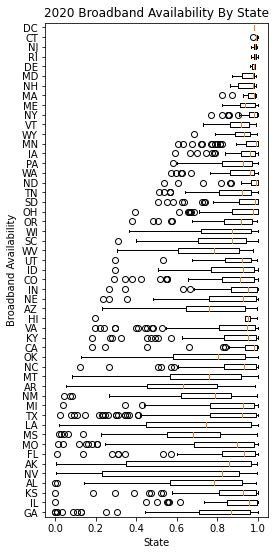

In [32]:
plt.rcParams['figure.figsize'] = [4, 20]
states = broad_2020['ST'].unique()
stateAvails = []
stateAvailMeans = []

for s in states :
    stateAvails.append(broad_2020['BROADBAND AVAILABILITY PER FCC'].loc[(broad_2020['ST'] == s)])
    stateRegion = regions['Region'].loc[(regions['ST'] == s)]
    stateAvailMeans.append([s, stateAvails[-1].mean(), stateRegion])
    
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2020 Broadband Availability By State')
plt.boxplot(stateAvails, vert=False)
#plt.subplots_adjust(left=0.25)
y = np.linspace(1,51, 51)
plt.yticks(y, states, rotation=0)
plt.show()

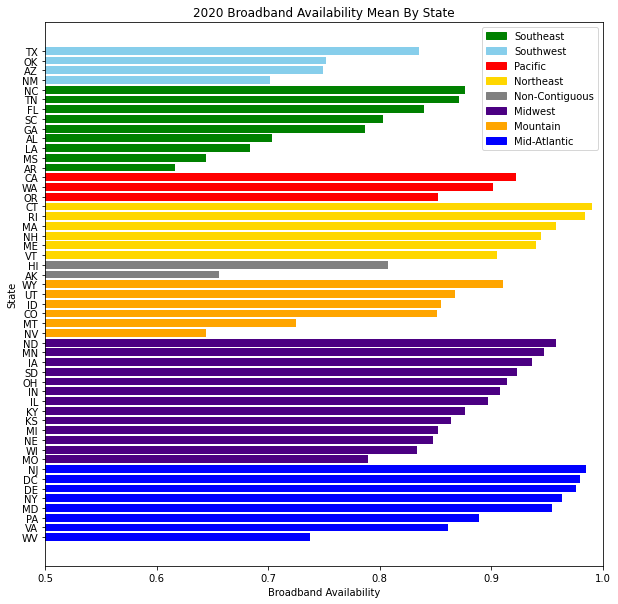

In [33]:
#Plot bargraphs of 2020 Broadband Availability means per state

#set up plot window
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)

def sortByRegion(e):
    if (str(e[2]).find("East") != -1 or str(e[2]).find("West") != -1):
        return str(e[2])[2:].lstrip()[4:].lstrip()
    return str(e[2])[2:].lstrip()

def sortByMean(e):
    return e[1]

stateAvailMeans.sort(key=sortByMean)
stateAvailMeans.sort(key=sortByRegion)
for s in stateAvailMeans :
    #color by region, red = bottom left and blue = top right
    r = str(s[2])
    if(r.find("Pacific") != -1) :
        clr = "red"
    elif(r.find("Mountain") != -1) :
        clr = "orange"
    elif(r.find("Northeast") != -1) :
        clr = "gold"
    elif(r.find("Southeast") != -1) :
        clr = "green"
    elif(r.find("Southwest") != -1) :
        clr = "skyblue"
    elif(r.find("Mid-Atlantic") != -1) :
        clr = "blue"
    elif(r.find("Midwest") != -1) :
        clr = "indigo"
    else :
        clr = "gray"
        
    #plot the data
    plt.barh(s[0], s[1], color=clr)
    
middleA = mpatches.Patch(color='blue', label='Mid-Atlantic')
northC = mpatches.Patch(color='gold', label='Northeast')
southC = mpatches.Patch(color='green', label='Southeast')
newEng = mpatches.Patch(color='indigo', label='Midwest')
southA = mpatches.Patch(color='skyblue', label='Southwest')
pacific = mpatches.Patch(color='red', label='Pacific')
mountain = mpatches.Patch(color='orange', label='Mountain')
nonContig = mpatches.Patch(color='gray', label='Non-Contiguous')
plt.legend(handles=[southC, southA, pacific, northC, nonContig, newEng, mountain, middleA])

plt.show()